Cr: [Loading data in yt: Can we make it better? by Matthew Turk](https://matthewturk.github.io/post/loading_data_in_yt/)

In [1]:
import h5py
import yt
import numpy as np
import collections

In [2]:
f = h5py.File("Data/chimera/chimera_000661800_grid_1_01.h5", "r")

# Exploration

### Key Explorations

In [3]:
f.keys()

<KeysViewHDF5 ['abundance', 'analysis', 'fluid', 'mesh', 'metadata', 'radiation', 'tracking']>

In [4]:
f["/mesh"].keys()

<KeysViewHDF5 ['array_dimensions', 'cycle', 'd_omega', 'dx_cf', 'dy_cf', 'dz_cf', 'i_frame', 'last_frame', 'my_hyperslab_group', 'nz_hyperslabs', 'ongrid_mask', 'phi_index_bound', 'r_comv', 'radial_index_bound', 't_bounce', 'theta_index_bound', 'time', 'time_steps', 'x_cf', 'x_ef', 'y_cf', 'y_ef', 'z_cf', 'z_ef']>

In [5]:
dims = f["/mesh/array_dimensions"][()]
xgrid, ygrid, zgrid = (f["/mesh/{}_ef".format(ax)][()] for ax in 'xyz')

In [6]:
xgrid.shape, ygrid.shape, zgrid.shape, dims

((723,), (241,), (2,), array([722, 240,   1], dtype=int32))

In [7]:
f["/fluid"].keys()

<KeysViewHDF5 ['LScompress', 'agr_c', 'agr_e', 'c_eos_i', 'dimeos', 'dudt_nu', 'dudt_nuc', 'e_int', 'entropy', 'eos_rho', 'grav_x_c', 'grav_y_c', 'grav_z_c', 'press', 'rho_c', 't_c', 'u_c', 'v_c', 'v_csound', 'wBVMD', 'w_c', 'ye_c', 'ylep']>

### Attributes Exploration

In [8]:
f.attrs.keys()

<KeysViewHDF5 []>

# Construction

### Field Match

In [9]:
collections.Counter(f["/fluid"][v].shape for v in f["/fluid"])

Counter({(): 1, (722,): 1, (723,): 1, (1,): 2, (2,): 1, (1, 240, 722): 17})

In [10]:
data = {n: v[()].T for n, v in f["/fluid"].items() if v.shape == tuple(dims[::-1])}
data.keys()

dict_keys(['dudt_nu', 'dudt_nuc', 'e_int', 'entropy', 'grav_x_c', 'grav_y_c', 'grav_z_c', 'press', 'rho_c', 't_c', 'u_c', 'v_c', 'v_csound', 'wBVMD', 'w_c', 'ye_c', 'ylep'])

### Mesh Structure

In [11]:
coord, conn = yt.hexahedral_connectivity(xgrid, ygrid, zgrid)

In [12]:
bbox = np.array([
    [xgrid.min(), xgrid.max()],
    [ygrid.min(), ygrid.max()],
    [zgrid.min(), zgrid.max()]
])

### Data Transform

In [13]:
ds = yt.load_hexahedral_mesh(data, conn, coord, bbox = bbox, geometry = ("spherical", ('r', 'theta', 'phi')))

yt : [INFO     ] 2022-03-09 14:19:49,389 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-03-09 14:19:49,392 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-03-09 14:19:49,394 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-03-09 14:19:49,395 Parameters: domain_right_edge         = [7.70275059e+09 3.14159265e+00 6.28318531e+00]
yt : [INFO     ] 2022-03-09 14:19:49,396 Parameters: cosmological_simulation   = 0


# Visualization

yt : [INFO     ] 2022-03-09 14:19:49,521 Setting origin='native' for spherical geometry.
yt : [INFO     ] 2022-03-09 14:19:49,535 xlim = 0.000000 7702750588.209774
yt : [INFO     ] 2022-03-09 14:19:49,535 ylim = -7702750588.209774 7702750588.209774
yt : [INFO     ] 2022-03-09 14:19:49,536 xlim = 0.000000 7702750588.209774
yt : [INFO     ] 2022-03-09 14:19:49,537 ylim = -7702750588.209774 7702750588.209774
yt : [INFO     ] 2022-03-09 14:19:49,539 Making a fixed resolution buffer of (('stream', 'e_int')) 800 by 800



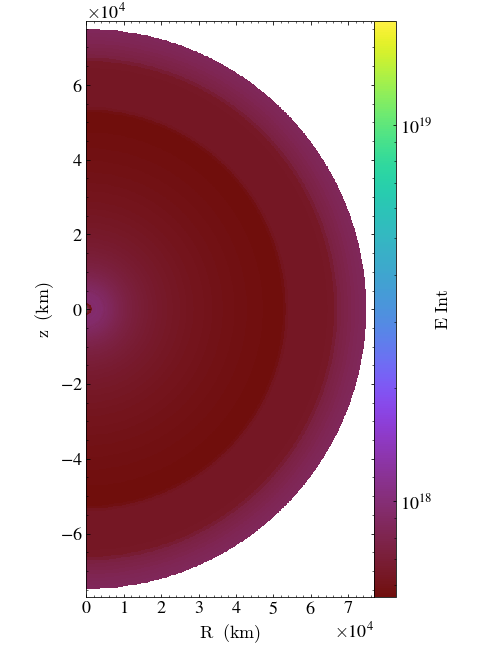

In [14]:
s = yt.SlicePlot(ds, "phi", "e_int")
s.show()

yt : [INFO     ] 2022-03-09 14:19:50,398 xlim = -3851375294.104887 3851375294.104887
yt : [INFO     ] 2022-03-09 14:19:50,399 ylim = -7702750588.209774 7702750588.209774
yt : [INFO     ] 2022-03-09 14:19:50,403 Making a fixed resolution buffer of (('stream', 'e_int')) 800 by 800



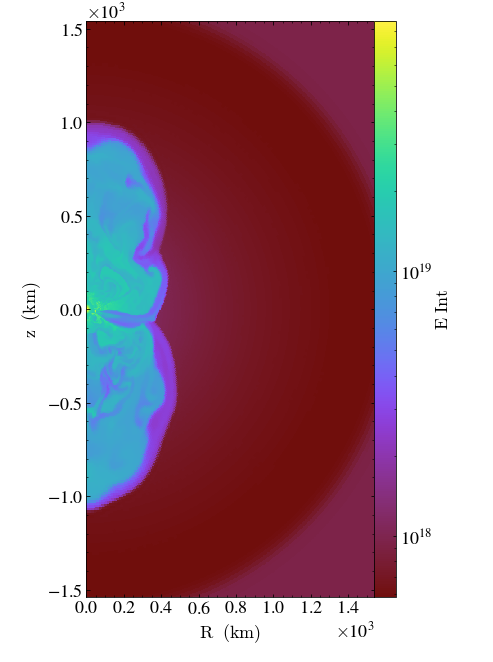

In [15]:
s.set_center( (0.0, 0.0) )
s.zoom(50)
s.pan_rel((0.5, 0.0))